Problem Statement
Business Context
From children to adults to the elderly, the importance of a balanced diet can't be emphasized enough for any age group for a healthy lifestyle. A proper, well-balanced meal plan helps to attain ideal body weight and reduce the risk of chronic diseases like diabetes, cardiovascular and other types of cancer.

The Health Company, which provides various diet plans for weight loss, conducted a market test experiment to test three different kinds of diets (A, B, C). Each of the volunteers was given one of the three diet plans and asked to follow the diet for 6 weeks.

Objective
In order to understand the effectiveness of each of the different diets for weight loss, the executives of the company reached out to you, a data scientist at the company. The weights before starting the diet and the weight 6 weeks after following the diet were recorded for 78 volunteers who were provided with either of the three diet plans. You have been asked to perform a statistical analysis to find evidence of whether the mean weight losses with respect to the three diet plans are significantly different. Consider a 5% significance level for the analysis.

Data Dictionary
The diet.csv file contains the following information:

diet: Type of the diet
preweight: Weight (in kg) before following the diet plan
weight6weeks: Weight (in kg) after 6 weeks of following the diet plan
0.2. Import the necessary libraries


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

In [2]:
Diets=pd.read_excel('D:/Ment Class/Practise11/Excel Data/Diets.xlsx')

In [3]:
Diets.head()

,diet,preweight,weight6weeks
0,B,60,60.0
1,B,103,103.0
2,A,58,54.2
3,A,60,54.0
4,A,64,63.3


In [4]:
# copying data to another variable to avoid any changes to original data
df = Diets.copy()

In [5]:
Diets.shape

(78, 3)

In [6]:
Diets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [7]:
Diets.describe()

,preweight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


In [8]:
Diets.diet.value_counts()

diet
B    27
C    27
A    24
Name: count, dtype: int64

In [9]:
# calculate the weight-loss
Diets['weightloss'] = Diets['weight6weeks'] - Diets['preweight']
Diets.head()

,diet,preweight,weight6weeks,weightloss
0,B,60,60.0,0.0
1,B,103,103.0,0.0
2,A,58,54.2,-3.8
3,A,60,54.0,-6.0
4,A,64,63.3,-0.7


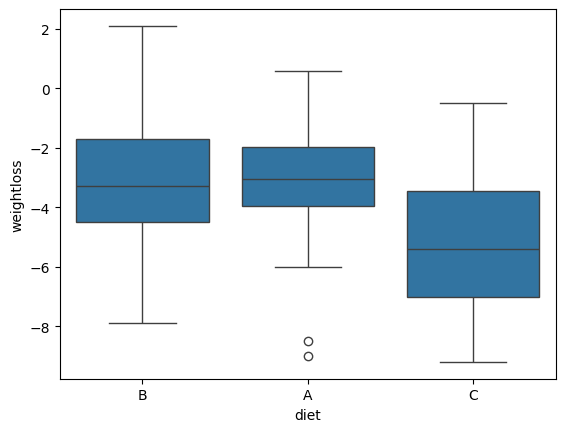

In [10]:
# visual analysis of the weightloss for the three diet-plans
sns.boxplot(x="diet", y="weightloss", data = Diets)
plt.show()

In [11]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(Diets[Diets['diet']=='A']['weightloss'],
                            Diets[Diets['diet']=='B']['weightloss'],
                            Diets[Diets['diet']=='C']['weightloss'])
print('The p-value is', p_value)

The p-value is 0.5376731304274011


In [12]:
# create separate variables to store the weightlosses with respect to the three diet-plans
weightloss_diet_A = Diets[Diets['diet']=='A']['weightloss']
weightloss_diet_B = Diets[Diets['diet']=='B']['weightloss']
weightloss_diet_C = Diets[Diets['diet']=='C']['weightloss']

In [13]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C)
print('The p-value is ', p_value)

The p-value is  0.0032290142385893524


In [14]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0032290142385893524 is less than the level of significance, we reject the null hypothesis.


Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that at least one of the mean weight losses with respect to the three diet-plans is different.

0.7. Conclusions
From the sample data, it was observed that taking a diet has reduced the average weight

The variation in the weights is very similar before and after taking a diet

From the sample data, it was observed that the diet-plan C has resulted in higher weight loss as compared to the other two plans

There was enough statistical evidence to say that the effect on weight loss is different for at least one of the diet plans

Further statistical analysis can be done to determine if the impact of diet-plan C is significantly greater than the other two plans

